<font size = '5' color='blue'> 2.1 Supervised Learning- Linear Regression </font> 

<font size = '4' color='red'> Question </font> How to classify the different types, class, or category?

野外七種有毒植物 https://hiking.biji.co/index.php?q=news&act=info&id=2468

Starting Example: If the features area, room number, and house age decide the house price.

| area ($x_1$) | rooms ($x_2$) | age ($x_3$)  | price ($y$) |
|----|---|----|------|
| 23 | 3 | 8  | 6562 |
| 15 | 2 | 7  | 4569 |
| 24 | 4 | 9  | 6897 |
| 29 | 5 | 4  | 7562 |
| 31 | 7 | 6  | 8234 |
| 25 | 3 | 10 | 7485 |

The question is how to find the price relations among the features.

Let us consider that area, rooms, and age are features / independent variables and price is the target / dependent variable. As we know the hypothesis for multiple linear regression is given by: 
\begin{alignat}{1}
\hat{y} = \theta_{0} x_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}+\ldots+\theta_{p} x_{p} \tag{1}
\end{alignat}

Parameters: $\Theta=[\theta_{0}, \theta_{1}, \theta_{2}, \ldots, \theta_{p}]^T$ <br>
Features: $X=[x_{0}, x_{1}, x_{2}, \ldots, x_{p}], x_0 = 1$

---

<font size = '4' color='blue'> 2.1.1 Solving Multiple Regression by Normal Equation </font>

If we want to solve the regression, the normal equation is an analytical approach to Linear Regression with a Least Square Cost Function. <br> 
Where θ represents the parameters and n is the number of features.
All that occurs in the above equation is the dot product of θ, and x is being summed. Thus, a more concise way to represent this is to use its vectorized form:

\begin{equation}
\hat{y} = h_{\theta} (X) = \Theta^T X = X \Theta \tag{2}
\end{equation} 

Given this approximate target function ($\hat{y}$), we can use our model to make predictions. <br>
To determine if our model has learned well, we must measure the performance of our model on the training data. <br>
For this purpose, we compute a loss function. The training process aims to find the values of $\Theta$ that minimize the loss function.

Here’s how we can represent our loss function mathematically:

\begin{equation}
J(\theta_0, \theta_1,...,\theta_p) = \frac{1}{2n} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)})^2. \tag{3}
\end{equation} 
\begin{equation}
J(\Theta) = \frac{1}{2n} (X\Theta -y)^T (X\Theta -y) \tag{4}
\end{equation} 

Now, we can simplify this a bit using some matrix transpose identities. I'll throw the \frac{1}{2m} part away since we're going to compare a derivative to zero anyway:
\begin{equation}
\begin{split}
J(\Theta) &= ((X\Theta)^T - y^T) (X\Theta -y) \\
          &= (X \Theta)^T X\Theta -(X \Theta)^T y - y^T X \Theta + y^Ty 
\end{split}\tag{5}
\end{equation} 

Note that $X\Theta$ is a vector, and so is y. So when we multiply one by another, it doesn't matter what the order is (as long as the dimensions work out). So we can further simplify:
\begin{equation}
J(\Theta) = \Theta^T X^T X \Theta -2(X \Theta)^T y + y^T y \tag{6}
\end{equation} 

Recall that here $\Theta$ is our unknown. 
To find where the above function has a minimum, we will derive by $\Theta$ and compare to 0. 
Recall that here we only use matrix notation to conveniently represent a system of linear formulae. 
So we derive by each component of the vector, and then combine the resulting derivatives into a vector again. 
The result is:
\begin{equation}
\frac{\partial J}{\partial \Theta} = 2X^T X \Theta - 2X^T y = 0 \tag{7}
\end{equation} 

NOTE: Here, our target is to find the optimum value for the parameters $\Theta$. To find the optimum value for $\Theta$ we can use the normal equation. So after finding the values for θ, our linear hypothesis or linear model will be ready to predict the price for new features or inputs.

Normal Equation is :

\begin{alignat}{1}
\Theta=\left(X^{T} X\right)^{-1} X^{\mathrm{T}} Y. \tag{8}
\end{alignat}

Considering the above data set, we can write,

$X$: an array of all independent features with size (n x m) where m is the total number of training samples, and n is the total number of features including ($x_0 = 1$) <br>
$X^{T}$: Transpose of array $X$ <br>
$Y$: $Y$ is a 1D array/column array/vector of target/dependent variable with size m where m is the total number of training samples.

In the above equation, $\Theta$ is a n + 1 dimensional vector, and our loss function is a function of the vector value. <br>
Consequently, the partial derivative of the loss function, $J$, has to be taken with respect to every parameter of $θ_j$ in turn. <br>
All of them must equal zero. <br>
Following this process and solving for all of the values of $θ$ from $θ_0$ to $θ_n$ will result in the values of $θ$ that minimize the loss function.

---

<font size = '4' color='blue'> Simple Linear Regression  </font> <br>
<font size = '3' color='green'> Case 1. A random data list generated from a regression function </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Create data set.
x, y = make_regression(n_samples=100, n_features=1,
                       n_informative=1, noise=10, random_state=10)
x.shape

(100, 1)

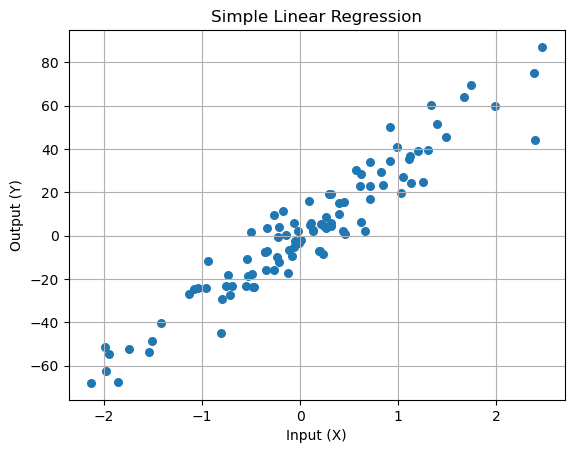

In [2]:
# Plot the generated data set.
plt.scatter(x, y, s=30, marker='o')
plt.xlabel("Input (X)")
plt.ylabel("Output (Y)")
plt.title('Simple Linear Regression')
plt.grid(); plt.show()

Using the normal equation to fit the data

In [3]:
# Convert target variable array from 1d to 2d.
y = y.reshape(100, 1)

# Adding x0=1 to each instance
x_new = np.array([np.ones(len(x)), x.flatten()]).T

# Using Normal Equation.
theta_best_values = np.linalg.inv(x_new.T.dot(x_new)).dot(x_new.T).dot(y)

# Display best values obtained.
print(theta_best_values)

[[ 0.52804151]
 [30.65896337]]


A given data for testing

In [4]:
# sample data instance.
x_sample = np.array([[-2], [4]])

# Adding x0=1 to each instance.
x_sample_new = np.array([np.ones(len(x_sample)), x_sample.flatten()]).T

# Display the sample.
print("Before adding x0:\n", x_sample)
print("After adding x0:\n", x_sample_new)

Before adding x0:
 [[-2]
 [ 4]]
After adding x0:
 [[ 1. -2.]
 [ 1.  4.]]


In [5]:
# code
# predict the values for given data instance.
predict_value = x_sample_new.dot(theta_best_values)
print(predict_value)

[[-60.78988524]
 [123.16389501]]


In [6]:
# Verification.
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Object.
lr.fit(x,y)			 # fit method.

# Print obtained theta values.
print("Best value of theta:",lr.intercept_,lr.coef_,sep='\n')

#predict.
print("predicted value:",lr.predict(x_sample),sep='\n')

Best value of theta:
[0.52804151]
[[30.65896337]]
predicted value:
[[-60.78988524]
 [123.16389501]]


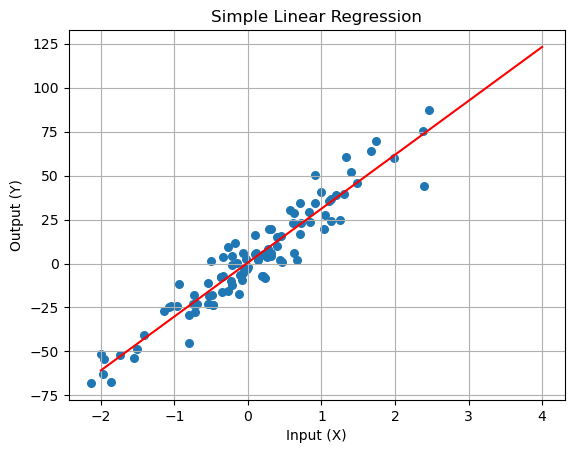

In [7]:
# Plot the output.
plt.scatter(x, y, s=30 , marker='o')
plt.plot(x_sample,predict_value,c='red')
plt.plot()
plt.xlabel("Input (X)")
plt.ylabel("Output (Y)")
plt.title('Simple Linear Regression')
plt.grid(); plt.show()

> What we find in this ? 

<font size = '4' color='blue'> Case 2. Given a data set </font>

Back to the starting Example: The house price is decided by the features area, room number, and house age.

| area ($x_1$) | rooms ($x_2$) | age ($x_3$)  | price ($y$) |
|----|---|----|------|
| 23 | 3 | 8  | 6562 |
| 15 | 2 | 7  | 4569 |
| 24 | 4 | 9  | 6897 |
| 29 | 5 | 4  | 7562 |
| 31 | 7 | 6  | 8234 |
| 25 | 3 | 10 | 7485 |

The question is how to find the relations of price among the features?

In [8]:
# datasets with 
X = np.array([[23,3, 8],[15,2,7],[24, 4, 9],[29, 5, 4], [25, 3, 10],[15,2,7]])
B = np.ones((len(X), 1))

X_new_T = np.hstack((B, X)).T
X_new_T

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [23., 15., 24., 29., 25., 15.],
       [ 3.,  2.,  4.,  5.,  3.,  2.],
       [ 8.,  7.,  9.,  4., 10.,  7.]])

\begin{equation*}
X^T =
\begin{bmatrix}
1  & 1  &  1 &  1 &  1 & 1 \\
23 & 15 & 24 & 29 & 31 & 25 \\
3  & 2  &  4 &  5 & 7  & 3\\
8  & 7  &  9 &  4 & 6  &10 \\ 
\end{bmatrix}
\end{equation*}

In [9]:
y = [6562, 4569, 6897, 7562, 8234, 7485]

\begin{equation*}
Y^T =
\begin{bmatrix}
6562 & 4569 & 6897 & 7562 & 8234 & 7485\\
\end{bmatrix}
\end{equation*}

In [10]:
# another datasets
x_train = [[15,2,7],[24, 4, 9],[29, 5, 4],[31, 7, 6]]
y_train = [4569, 6897, 7562,  8234]
x_test = [[23,3, 8], [25, 3, 10]]
y_test = [6562, 7485]

In [11]:
import numpy as np

class Linear_Regression:
	def __init__(self):
		pass

	def __compute(self, x, y):
		try:
			# one line code
			self.__thetas = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
		except Exception as e:
			raise e
		
	def fit(self, x, y):
		x = np.array(x)
		ones_ = np.ones(x.shape[0])
		x = np.c_[ones_,x]
		y = np.array(y)
		self.__compute(x,y)

	@property
	def coef_(self):
		return self.__thetas[0]

	@property
	def intercept_(self):
		return self.__thetas[1:]

	def predict(self, x):
		try:
			x = np.array(x)
			ones_ = np.ones(x.shape[0])
			x = np.c_[ones_,x]
			result = np.dot(x,self.__thetas)
			return result			
		except Exception as e:
			raise e

In [12]:
# testing the model...
lr = Linear_Regression()
lr.fit(x_train,y_train)

print(lr.coef_,lr.intercept_)

print('errors of prediction: ', y_test - lr.predict(x_test))

307.16666666671335 [236.57142857  -3.45238095 102.88095238]
errors of prediction:  [  1.        245.0952381]


---

<font size = '4' color='blue'> Case Study 3: diabetes </font> 

Here, we have the real data set of diabetes from https://www.kaggle.com/datasets/mathchi/diabetes-data-set.

In [13]:
from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [27]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [14]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names
df['target'] = diabetes.target

In [15]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


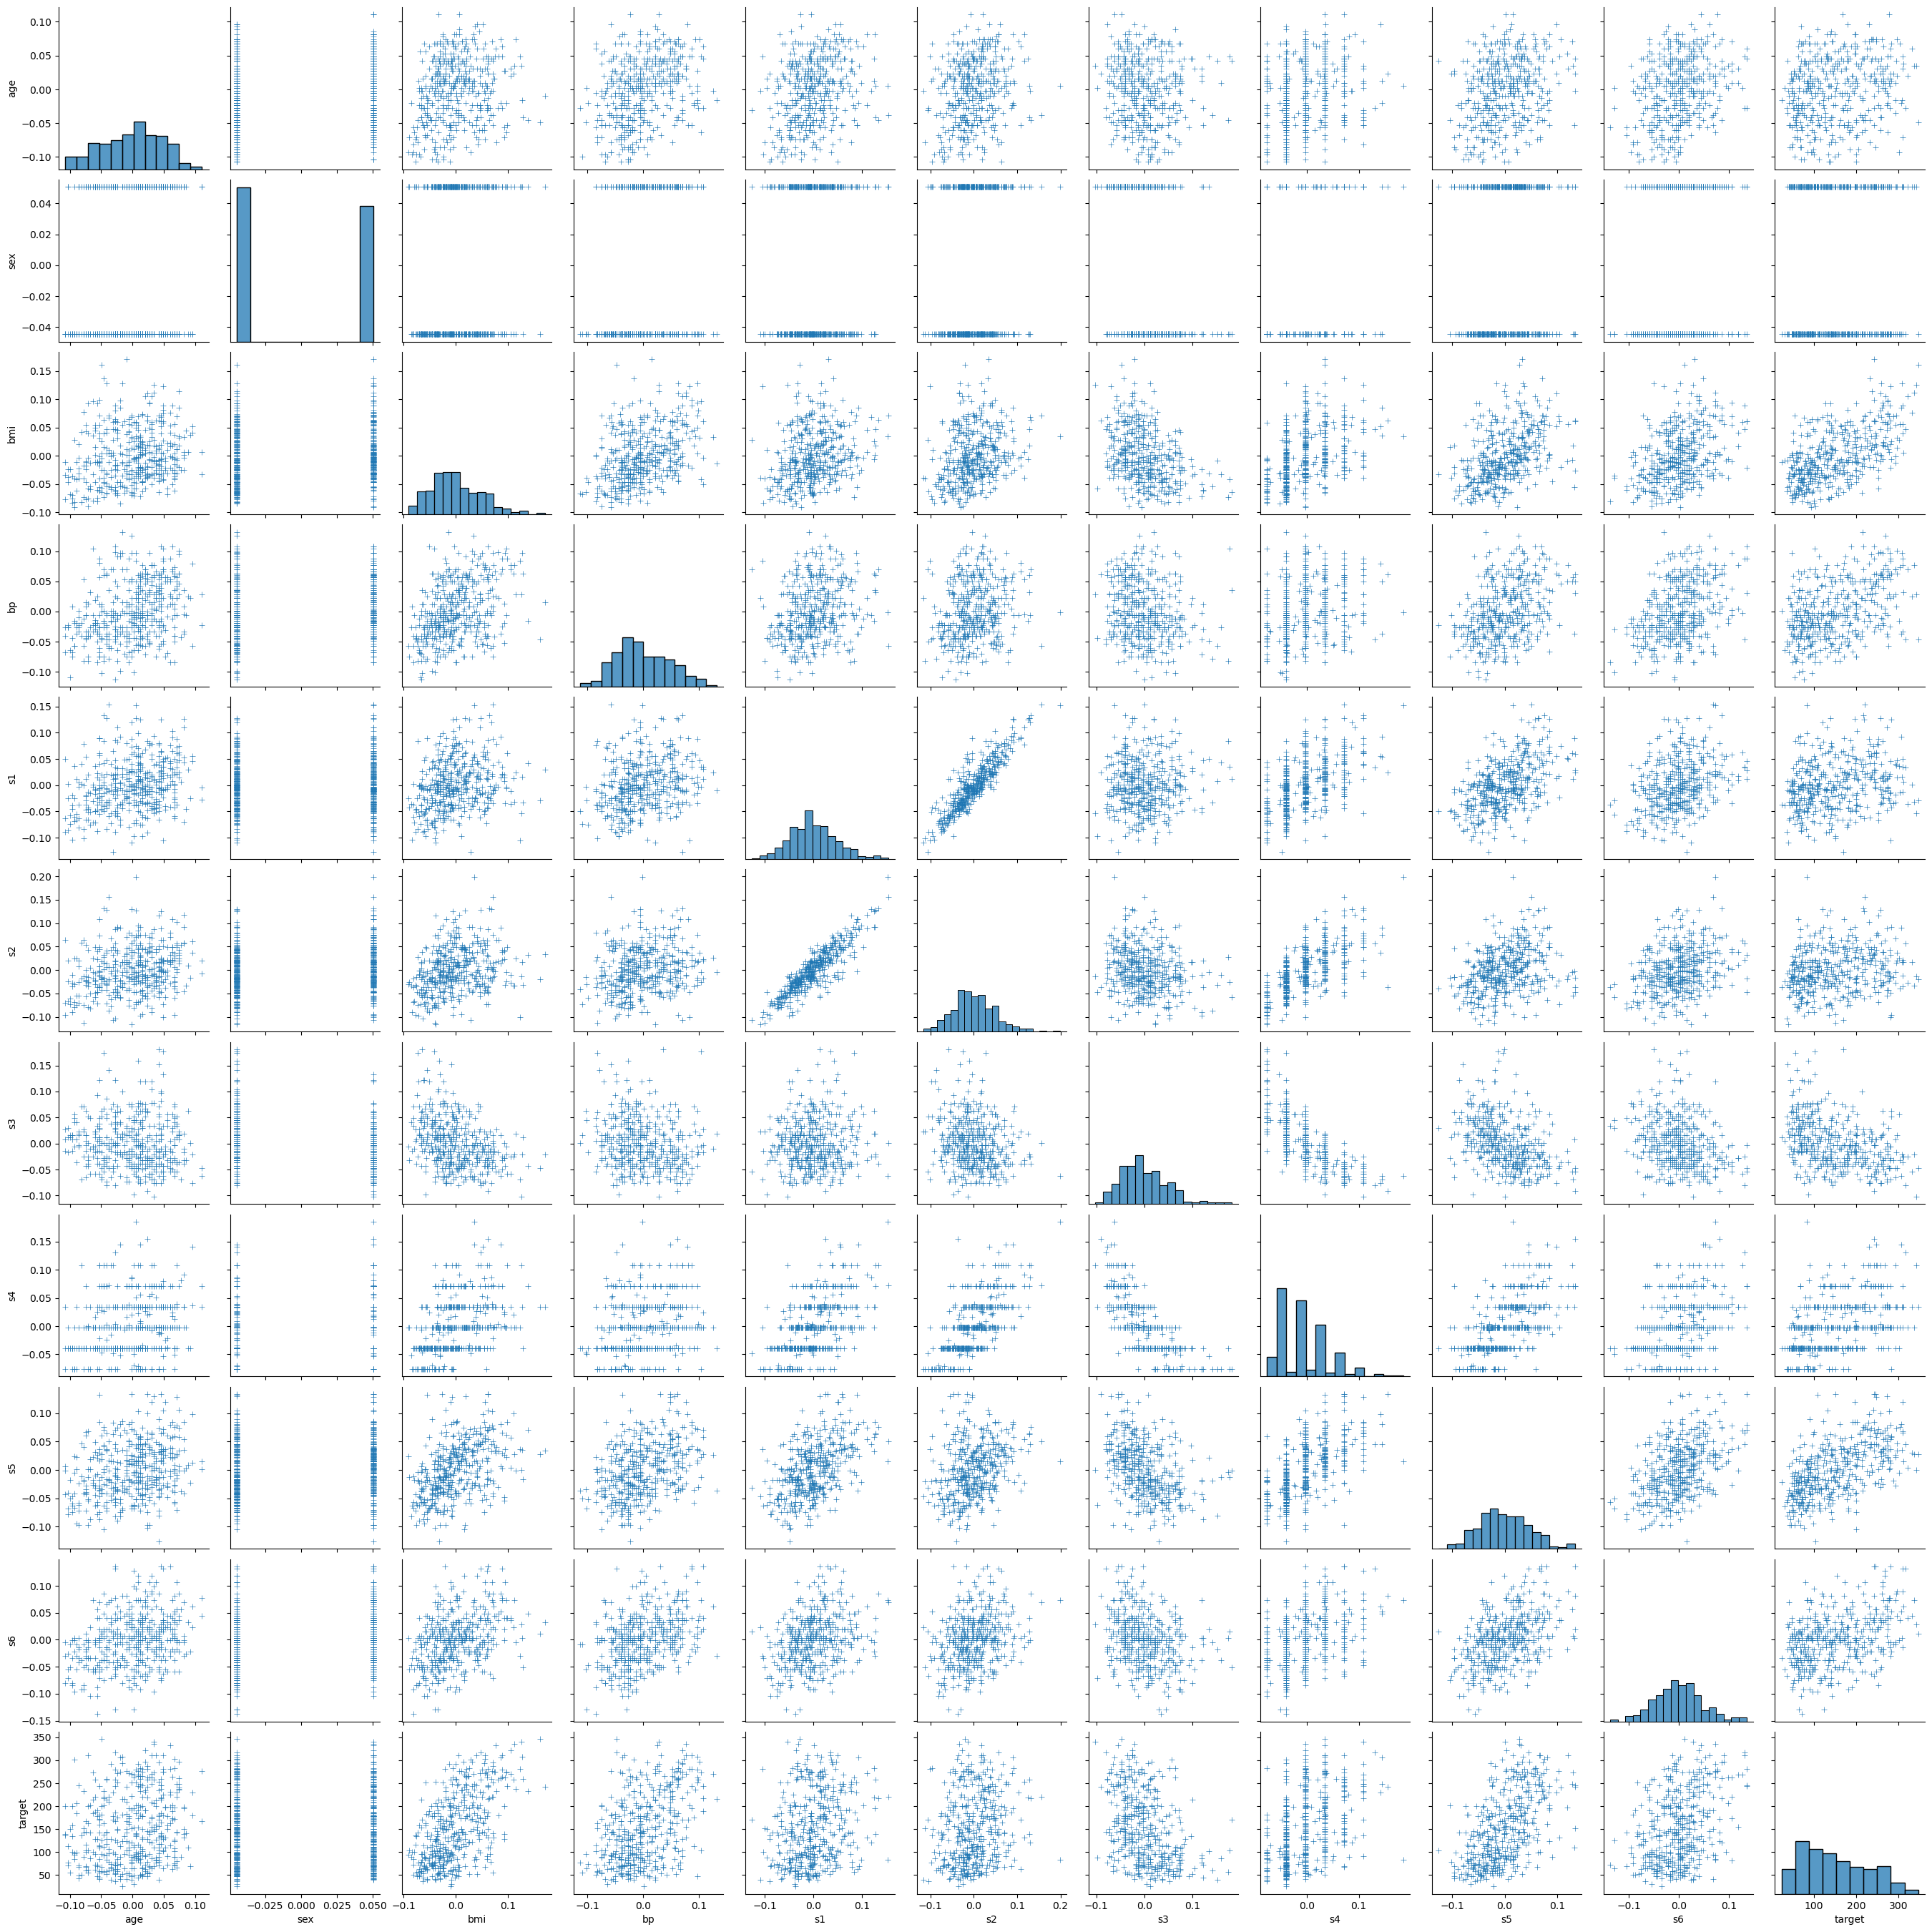

In [16]:
sns.pairplot(df, markers='+')
plt.show()

In [17]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [18]:
print(type(diabetes_X_train))

<class 'numpy.ndarray'>


In [19]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


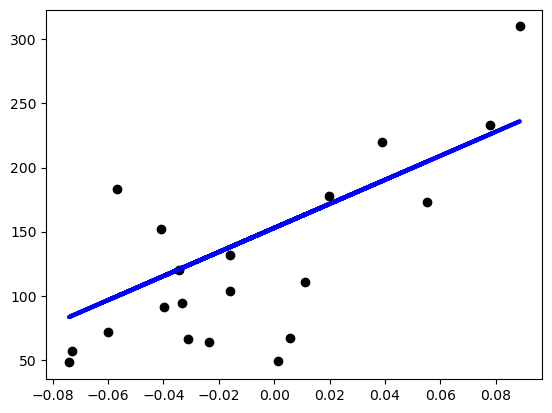

In [20]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)
plt.show()

Limits of the Normal Euqation
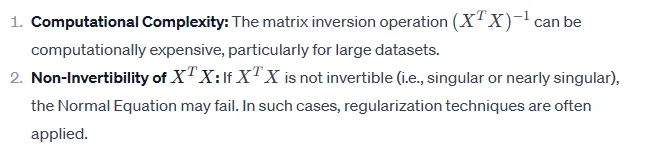

<font size = '3' color='blue'> Questions: </font> 
1. How do you decide what features to select?
2. Do there exist a lot of irrelevant features? Can we reduce features in advance?

---

<font size = '4' color='blue'> Case Study 4: Iris </font>

https://www.kaggle.com/datasets/uciml/iris

Machine Learning with Iris Dataset <br>
https://www.kaggle.com/code/jchen2186/machine-learning-with-iris-dataset

<font size = '3' color='blue'> Reduce features using PCA </font>

In [21]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [22]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [23]:
# This dataset is way too high-dimensional. Better do PCA:
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest

pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)

Apply another method (SVC, support vector classifier)

In [24]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

In [25]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 1/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.933 total time=   0.0s
[CV 2/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 2/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.933 total time=   0.0s
[CV 3/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 3/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.867 total time=   0.0s
[CV 4/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 4/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.933 total time=   0.0s
[CV 5/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=

<font size = '4' color='blue'> Questions: </font>
1. What are the limitations of linear regression?
2. What is the next method for supervised learning?

[Ref] <br>
https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/